# <center> Machine Learning and Deep Learning </center>

## 1. Simple Linear Regression

In [1]:
#Simple Linear Regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


dataset = pd.read_csv('Salary_Data.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(dataset.head(5))
print(y)

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [2]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)
print(x_train)

[[ 2.9]
 [ 5.1]
 [ 3.2]
 [ 4.5]
 [ 8.2]
 [ 6.8]
 [ 1.3]
 [10.5]
 [ 3. ]
 [ 2.2]
 [ 5.9]
 [ 6. ]
 [ 3.7]
 [ 3.2]
 [ 9. ]
 [ 2. ]
 [ 1.1]
 [ 7.1]
 [ 4.9]
 [ 4. ]]


In [3]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [4]:
y_pred = regressor.predict(x_test)
y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

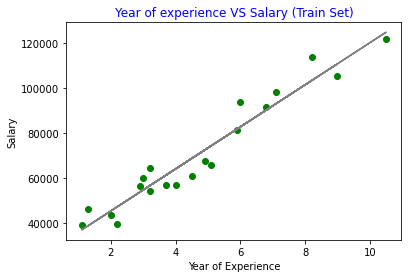

In [5]:
plt.scatter(x_train, y_train, color = "green")
plt.plot(x_train, regressor.predict(x_train), color = "Grey")
plt.title("Year of experience VS Salary (Train Set)", color= "Blue")
plt.xlabel("Year of Experience")
plt.ylabel("Salary")
plt.show()

## 2. Multiple Linear Regression

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
dataset = pd.read_csv('50_Startups.csv')
print(dataset.head(5))


   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


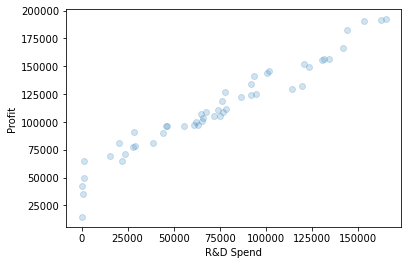

In [90]:
plt.scatter(dataset["R&D Spend"], dataset["Profit"], alpha = .2)
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.show()

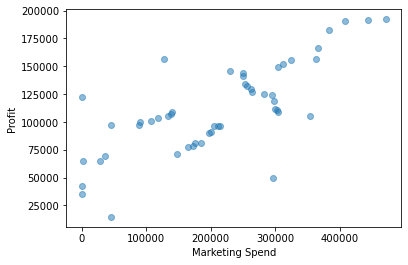

In [91]:
plt.scatter(dataset["Marketing Spend"], dataset["Profit"], alpha = .5)
plt.xlabel("Marketing Spend")
plt.ylabel("Profit")
plt.show()

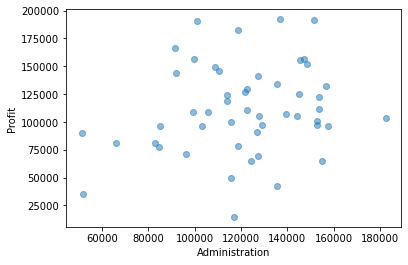

In [92]:
plt.scatter(dataset["Administration"], dataset["Profit"], alpha = .5)
plt.xlabel("Administration")
plt.ylabel("Profit")
plt.show()

In [93]:
dataset.State.value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

In [94]:
dataset["California State"] = np.where(dataset["State"] == "California", 1, 0)
dataset["New York State"] = np.where(dataset["State"] == "New York", 1, 0)
dataset["Florida State"] = np.where(dataset["State"] == "Florida", 1, 0)

dataset.drop(columns="State", axis=1, inplace=True)
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,California State,New York State,Florida State
0,165349.20,136897.80,471784.10,192261.83,0,1,0
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,0,1,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [95]:
#x = dataset[['R&D Spend','Administration', 'Marketing Spend', 'California State', 'New York State', 'Florida State']].values
#y = dataset['Profit'].values
dependent_variable = 'Profit'
independent_variables = dataset.columns.tolist()
independent_variables.remove(dependent_variable)
independent_variables
x = dataset[independent_variables].values
y = dataset[dependent_variable].values
print(x)

[[1.65e+05 1.37e+05 4.72e+05 0.00e+00 1.00e+00 0.00e+00]
 [1.63e+05 1.51e+05 4.44e+05 1.00e+00 0.00e+00 0.00e+00]
 [1.53e+05 1.01e+05 4.08e+05 0.00e+00 0.00e+00 1.00e+00]
 [1.44e+05 1.19e+05 3.83e+05 0.00e+00 1.00e+00 0.00e+00]
 [1.42e+05 9.14e+04 3.66e+05 0.00e+00 0.00e+00 1.00e+00]
 [1.32e+05 9.98e+04 3.63e+05 0.00e+00 1.00e+00 0.00e+00]
 [1.35e+05 1.47e+05 1.28e+05 1.00e+00 0.00e+00 0.00e+00]
 [1.30e+05 1.46e+05 3.24e+05 0.00e+00 0.00e+00 1.00e+00]
 [1.21e+05 1.49e+05 3.12e+05 0.00e+00 1.00e+00 0.00e+00]
 [1.23e+05 1.09e+05 3.05e+05 1.00e+00 0.00e+00 0.00e+00]
 [1.02e+05 1.11e+05 2.29e+05 0.00e+00 0.00e+00 1.00e+00]
 [1.01e+05 9.18e+04 2.50e+05 1.00e+00 0.00e+00 0.00e+00]
 [9.39e+04 1.27e+05 2.50e+05 0.00e+00 0.00e+00 1.00e+00]
 [9.20e+04 1.35e+05 2.53e+05 1.00e+00 0.00e+00 0.00e+00]
 [1.20e+05 1.57e+05 2.57e+05 0.00e+00 0.00e+00 1.00e+00]
 [1.15e+05 1.23e+05 2.62e+05 0.00e+00 1.00e+00 0.00e+00]
 [7.80e+04 1.22e+05 2.64e+05 1.00e+00 0.00e+00 0.00e+00]
 [9.47e+04 1.45e+05 2.83e+05 0.

In [96]:
'''
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [("encoder", OneHotEncoder(), [3])], remainder = 'passthrough')
x = np.array(ct.fit_transform(x)) '''


'\nfrom sklearn.compose import ColumnTransformer\nfrom sklearn.preprocessing import OneHotEncoder\nct = ColumnTransformer(transformers = [("encoder", OneHotEncoder(), [3])], remainder = \'passthrough\')\nx = np.array(ct.fit_transform(x)) '

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
#Scaler = MinMaxScaler()
#x_train = Scaler.fit_transform(x_train)
#x_test = Scaler.fit_transform(x_test)
#x_train

In [98]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [99]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


In [100]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9347068473282425